Work on the cliques and clique graphs of strongly regular graphs

In [ ]:
def clique_construct(G):
    """
    clique_construct creates the clique graph of the given graph.

    :param G: A graph
    :return: the clique graph and a list of the cliques in the graph
    """ 
    done_cliques = []
    H = graphs.EmptyGraph()
    cliques = list(sage.graphs.cliquer.all_max_clique(G))
    vertex = 0
    for clique in cliques:
        H.add_vertex(vertex)
        for done_clique in done_cliques:
            adjacents = list(set(clique).intersection(done_clique))
            if len(adjacents) > 0:
                H.add_edge(vertex, done_cliques.index(done_clique))
        done_cliques.append(clique)
        vertex += 1
    return H, cliques



def is_clique_regular(G):
    """
    is_clique_regular finds if the given graph is clique regular graph.

    :param G: A graph object
    :return: boolean
    """ 
    cliques = list(sage.graphs.cliquer.all_max_clique(G))
    for u, v, _ in G.edges():
        count = 0
        for clique in cliques:
            if u in clique and v in clique:
                count += 1
        if count != 1:
            return False
    return True

def is_complete_multipartite(m):
    """
    is_complete_multipartite finds if the given graph is a complete multipartite graph.

    :param m: the number of partions in the graph
    :return: boolean
    """ 
    assert m > 1
    def is_complete_m_partite(g):
        coloring = g.coloring()
        if coloring is None: #empty graph
            return False
        return len(coloring) == m and g.num_edges() == mul(map(len, coloring))
    return is_complete_m_partite

In [33]:
import json
from sage.features.databases import DatabaseGraphs
data_dir = os.path.dirname(DatabaseGraphs().absolute_filename())
filename = os.path.join(data_dir, 'brouwer_srg_database.json')
with open(filename) as fobj:
    database = json.load(fobj)

# srgs = list(filter(lambda x: x[4] == 'exists' and x[2] != 1 and x[2] != 0, database))
srgs = list(filter(lambda x: x[4] == 'exists', database))
srgs = list(map(lambda x: x[:4], srgs))
print(len(srgs))

valid_parameters = []
invalid_parameters = []
for srg in srgs[:150]:
    if srgs.index(srg) % 10 == 0:
        print(srgs.index(srg))
    try:
        G = Graph(graphs.strongly_regular_graph(srg[0], srg[1], srg[2], srg[3]).adjacency_matrix())
    except:
        print(srgs.index(srg), srg, "Error")
        pass
    else:
        cliques = list(sage.graphs.cliquer.all_max_clique(G))
        try:
            for u, v, _ in G.edges():
                count = 0
                for clique in cliques:
                    if u in clique and v in clique:
                        count += 1
                if count != 1:
                    invalid_parameters.append(srg)
                    raise
        except:
            pass
        else:
            valid_parameters.append(srg)

1165
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


In [41]:
print(len(valid_parameters))
print(valid_parameters)

65
[[5, 2, 0, 1], [9, 4, 1, 2], [10, 3, 0, 1], [10, 6, 3, 4], [15, 6, 1, 3], [15, 8, 4, 4], [16, 5, 0, 2], [16, 6, 2, 2], [21, 10, 5, 4], [25, 8, 3, 2], [25, 12, 5, 6], [26, 15, 8, 9], [27, 10, 1, 5], [28, 12, 6, 4], [35, 18, 9, 9], [36, 10, 4, 2], [36, 14, 7, 4], [36, 15, 6, 6], [40, 12, 2, 4], [45, 12, 3, 3], [45, 16, 8, 4], [49, 12, 5, 2], [49, 18, 7, 6], [49, 24, 11, 12], [50, 7, 0, 1], [50, 28, 15, 16], [55, 18, 9, 4], [56, 10, 0, 2], [57, 24, 11, 9], [63, 30, 13, 15], [63, 32, 16, 16], [64, 14, 6, 2], [64, 18, 2, 6], [64, 21, 8, 6], [64, 28, 12, 12], [66, 20, 10, 4], [70, 27, 12, 9], [77, 16, 0, 4], [78, 22, 11, 4], [81, 16, 7, 2], [81, 20, 1, 6], [81, 24, 9, 6], [81, 32, 13, 12], [81, 40, 19, 20], [82, 45, 24, 25], [85, 20, 3, 5], [91, 24, 12, 4], [96, 20, 4, 4], [99, 50, 25, 25], [100, 18, 8, 2], [100, 22, 0, 6], [100, 27, 10, 6], [100, 33, 14, 9], [100, 36, 14, 12], [105, 26, 13, 4], [111, 44, 19, 16], [112, 30, 2, 10], [117, 36, 15, 9], [120, 28, 14, 4], [121, 20, 9, 2], [121

In [42]:
print(len(invalid_parameters))

85


In [43]:
windmills = [[5, 2, 0, 1], [9, 4, 1, 2], [10, 3, 0, 1], [15, 6, 1, 3], [16, 5, 0, 2], [16, 6, 2, 2], [25, 8, 3, 2], [27, 10, 1, 5], [36, 10, 4, 2], [40, 12, 2, 4], [45, 12, 3, 3], [49, 12, 5, 2], [50, 7, 0, 1], [56, 10, 0, 2], [64, 14, 6, 2], [64, 18, 2, 6], [77, 16, 0, 4], [81, 16, 7, 2], [81, 20, 1, 6], [85, 20, 3, 5], [96, 20, 4, 4], [100, 18, 8, 2], [100, 22, 0, 6], [112, 30, 2, 10], [121, 20, 9, 2], [125, 28, 3, 7], [144, 22, 10, 2], [156, 30, 4, 6], [165, 36, 3, 9], [169, 24, 11, 2], [175, 30, 5, 5], [196, 26, 12, 2], [225, 28, 13, 2], [243, 22, 1, 2], [256, 30, 14, 2], [280, 36, 8, 4], [289, 32, 15, 2], [297, 40, 7, 5], [324, 34, 16, 2], [325, 68, 3, 17], [343, 54, 5, 9], [361, 36, 17, 2], [378, 52, 1, 8], [400, 38, 18, 2], [400, 56, 6, 8], [441, 40, 19, 2], [441, 56, 7, 7], [484, 42, 20, 2], [529, 44, 21, 2], [576, 46, 22, 2], [585, 72, 7, 9], [625, 48, 23, 2], [640, 72, 8, 8], [676, 50, 24, 2], [729, 52, 25, 2], [729, 88, 7, 11], [729, 112, 1, 20], [756, 130, 4, 26], [784, 54, 26, 2], [820, 90, 8, 10], [841, 56, 27, 2], [891, 90, 9, 9], [900, 58, 28, 2], [961, 60, 29, 2], [1024, 62, 30, 2], [1089, 64, 31, 2], [1105, 80, 15, 5], [1156, 66, 32, 2], [1225, 68, 33, 2], [1296, 70, 34, 2]]
print(len(list(filter(lambda x: x[0] <= 121, windmills))))
count = 0 
for windmill in windmills:
    try:
        valid_parameters.index(windmill)
    except:
        pass
    else:
        count += 1
print(count)

25
25


In [44]:
print("# of Verticies\tDegree\t # of Common Adjacents\t# of Common not Adjacents\tClique Size\t# of Cliques\tHas Windmill\t# of Automorphisms")
print("--------------------------------------------------------------------------------------------------------------------------------------")
for valid in valid_parameters:
    G = graphs.strongly_regular_graph(valid[0], valid[1], valid[2], valid[3])
    print(valid[0],"\t\t", valid[1],"\t\t", valid[2],"\t\t\t", valid[3],"\t\t\t", G.clique_number(),"\t\t", len(list(sage.graphs.cliquer.all_max_clique(G))), "\t\t", valid in windmills, "\t\t", graphs.strongly_regular_graph(valid[0], valid[1], valid[2], valid[3]).automorphism_group().cardinality())

# of Verticies	Degree	 # of Common Adjacents	# of Common not Adjacents	Clique Size	# of Cliques	Has Windmill	# of Automorphisms
--------------------------------------------------------------------------------------------------------------------------------------
5 		 2 		 0 			 1 			 2 		 5 		 True 		 10
9 		 4 		 1 			 2 			 3 		 6 		 True 		 72
10 		 3 		 0 			 1 			 2 		 15 		 True 		 120
10 		 6 		 3 			 4 			 4 		 5 		 False 		 120
15 		 6 		 1 			 3 			 3 		 15 		 True 		 720
15 		 8 		 4 			 4 			 5 		 6 		 False 		 720
16 		 5 		 0 			 2 			 2 		 40 		 True 		 1920
16 		 6 		 2 			 2 			 4 		 8 		 True 		 1152
21 		 10 		 5 			 4 			 6 		 7 		 False 		 5040
25 		 8 		 3 			 2 			 5 		 10 		 True 		 28800
25 		 12 		 5 			 6 			 5 		 15 		 False 		 600
26 		 15 		 8 			 9 			 6 		 13 		 False 		 39
27 		 10 		 1 			 5 			 3 		 45 		 True 		 51840
28 		 12 		 6 			 4 			 7 		 8 		 False 		 40320
35 		 18 		 9 			 9 			 7 		 15 		 False 		 60
36 		 10 		 4 			 2 			 6 		 12 		 Tru

In [46]:
# All graphs where lambda > 1 and excluding rook's graphs
count = 0
for valid in valid_parameters:
    if valid[2] > 1 and not (math.sqrt(valid[0]).is_integer() and valid[3] == 2):
        G = graphs.strongly_regular_graph(valid[0], valid[1], valid[2], valid[3])
        count += 1
        print(str(valid) + ", w = " + str(valid[2]) + " + " + str(G.clique_number() - valid[2]) + " = " + str(G.clique_number()), ", n = " + str(len(list(sage.graphs.cliquer.all_max_clique(G)))), ", ", abs(len(list(sage.graphs.cliquer.all_max_clique(G))) - G.clique_number()))
        GED = G.laplacian_matrix().elementary_divisors()
        print("Elementary Divisors of G:", GED)
        print(dict((i, GED.count(i)) for i in GED))
        H, _ = clique_construct(G)
        HED = H.laplacian_matrix().elementary_divisors()
        print("Elementary Divisors of H:", HED)
        print(dict((i, HED.count(i)) for i in HED))
        print()
print(count)

[10, 6, 3, 4], w = 3 + 1 = 4 , n = 5 ,  1
Elementary Divisors of G: [1, 1, 1, 1, 4, 8, 40, 40, 40, 0]
{1: 4, 4: 1, 8: 1, 40: 3, 0: 1}
Elementary Divisors of H: [1, 5, 5, 5, 0]
{1: 1, 5: 3, 0: 1}

[15, 8, 4, 4], w = 4 + 1 = 5 , n = 6 ,  1
Elementary Divisors of G: [1, 1, 1, 1, 2, 2, 10, 10, 10, 10, 60, 60, 60, 60, 0]
{1: 4, 2: 2, 10: 4, 60: 4, 0: 1}
Elementary Divisors of H: [1, 6, 6, 6, 6, 0]
{1: 1, 6: 4, 0: 1}

[21, 10, 5, 4], w = 5 + 1 = 6 , n = 7 ,  1
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 4, 12, 12, 12, 12, 12, 12, 12, 12, 84, 84, 84, 84, 84, 0]
{1: 6, 4: 1, 12: 8, 84: 5, 0: 1}
Elementary Divisors of H: [1, 7, 7, 7, 7, 7, 0]
{1: 1, 7: 5, 0: 1}

[25, 12, 5, 6], w = 5 + 0 = 5 , n = 15 ,  10
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 30, 30, 30, 30, 30, 150, 150, 150, 150, 150, 150, 150, 0]
{1: 9, 5: 3, 30: 5, 150: 7, 0: 1}
Elementary Divisors of H: [1, 1, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 50, 150, 0]
{1: 2, 2: 1, 10: 9, 50: 1, 150: 1, 0: 1}

[26, 15, 8,

In [49]:
# Graphs Unclassified
count = 0
for valid in valid_parameters:
    if valid[2] > 1 and not (math.sqrt(valid[0]).is_integer() and valid[3] == 2):
        G = graphs.strongly_regular_graph(valid[0], valid[1], valid[2], valid[3])
        if abs(len(list(sage.graphs.cliquer.all_max_clique(G))) - G.clique_number()) != 1 and G.clique_number() - valid[2] != -7 and G.clique_number() - valid[2] != -14 and G.clique_number() - valid[2] != -4 and not (G.clique_number() - valid[2] == 0 and valid != [36,14,4,6]) and not (G.clique_number() - valid[2] == -2 and valid != [50,21,8,9]):
            count += 1
            print(str(valid) + ", w = " + str(valid[2]) + " + " + str(G.clique_number() - valid[2]) + " = " + str(G.clique_number()), ", n = " + str(len(list(sage.graphs.cliquer.all_max_clique(G)))), ", ", abs(len(list(sage.graphs.cliquer.all_max_clique(G))) - G.clique_number()))
            GED = G.laplacian_matrix().elementary_divisors()
            print("Elementary Divisors of G:", GED)
            print(dict((i, GED.count(i)) for i in GED))
            H, _ = clique_construct(G)
            HED = H.laplacian_matrix().elementary_divisors()
            print("Elementary Divisors of H:", HED)
            print(dict((i, HED.count(i)) for i in HED))
            # L = G.line_graph()
            # print("Elementary Divisors of L:", L.laplacian_matrix().elementary_divisors())
            print()
print(count)

[40, 12, 2, 4], w = 2 + 2 = 4 , n = 40 ,  36
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 10, 10, 10, 10, 10, 10, 10, 10, 40, 80, 80, 80, 80, 80, 80, 160, 160, 160, 160, 160, 160, 160, 160, 0]
{1: 10, 2: 6, 10: 8, 40: 1, 80: 6, 160: 8, 0: 1}
Elementary Divisors of H: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10, 40, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 0]
{1: 16, 10: 8, 40: 1, 160: 14, 0: 1}

[45, 12, 3, 3], w = 3 + 2 = 5 , n = 27 ,  22
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 15, 15, 15, 15, 45, 45, 45, 45, 45, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 0]
{1: 15, 3: 6, 15: 4, 45: 5, 135: 14, 0: 1}
Elementary Divisors of H: [1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 45, 135, 135, 135, 135, 135, 0]
{1: 7, 9: 13, 45: 1, 135: 5, 0: 1}

[63, 30, 13, 15], w = 13 + -6 = 7 , n = 45 ,  38
Elementary Divi

In [52]:
# Rook Graphs
count = 0
for valid in valid_parameters:
    if valid[2] > 1 and (math.sqrt(valid[0]).is_integer() and valid[3] == 2):
        count += 1
        G = graphs.strongly_regular_graph(valid[0], valid[1], valid[2], valid[3])
        print(str(valid) + ", w = " + str(valid[2]) + " + " + str(G.clique_number() - valid[2]) + " = " + str(G.clique_number()), ", n = " + str(len(list(sage.graphs.cliquer.all_max_clique(G)))), ", ", abs(len(list(sage.graphs.cliquer.all_max_clique(G))) - G.clique_number()))
        GED = G.laplacian_matrix().elementary_divisors()
        print("Elementary Divisors of G:", GED)
        print(dict((i, GED.count(i)) for i in GED))
        H, _ = clique_construct(G)
        HED = H.laplacian_matrix().elementary_divisors()
        print("Elementary Divisors of H:", HED)
        print(dict((i, HED.count(i)) for i in HED))
        # L = G.line_graph()
        # print("Elementary Divisors of L:", L.laplacian_matrix().elementary_divisors())
        print()
print(count)

[16, 6, 2, 2], w = 2 + 2 = 4 , n = 8 ,  4
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 32, 32, 32, 32, 0]
{1: 6, 8: 5, 32: 4, 0: 1}
Elementary Divisors of H: [1, 1, 4, 4, 4, 4, 16, 0]
{1: 2, 4: 4, 16: 1, 0: 1}

[25, 8, 3, 2], w = 3 + 2 = 5 , n = 10 ,  5
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 0]
{1: 8, 10: 10, 50: 6, 0: 1}
Elementary Divisors of H: [1, 1, 5, 5, 5, 5, 5, 5, 25, 0]
{1: 2, 5: 6, 25: 1, 0: 1}

[36, 10, 4, 2], w = 4 + 2 = 6 , n = 12 ,  6
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 72, 72, 72, 72, 72, 72, 72, 0]
{1: 10, 12: 17, 72: 8, 0: 1}
Elementary Divisors of H: [1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 36, 0]
{1: 2, 6: 8, 36: 1, 0: 1}

[49, 12, 5, 2], w = 5 + 2 = 7 , n = 14 ,  7
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

In [53]:
# Graphs where n - w = 1 and lambda - 7 = w and lambda - 14 = w and lambda - 2 = w excluding 50, 21, 8, 9
count = 0
for valid in valid_parameters:
    if valid[2] > 1 and not (math.sqrt(valid[0]).is_integer() and valid[3] == 2):
        G = graphs.strongly_regular_graph(valid[0], valid[1], valid[2], valid[3])
        if abs(len(list(sage.graphs.cliquer.all_max_clique(G))) - G.clique_number()) == 1  or G.clique_number() - valid[2] == -7 or G.clique_number() - valid[2] == -14 or (G.clique_number() - valid[2] == -2 and valid != [50,21,8,9]):
            count += 1
            print(str(valid) + ", w = " + str(valid[2]) + " + " + str(G.clique_number() - valid[2]) + " = " + str(G.clique_number()), ", n = " + str(len(list(sage.graphs.cliquer.all_max_clique(G)))), ", ", abs(len(list(sage.graphs.cliquer.all_max_clique(G))) - G.clique_number()))
            GED = G.laplacian_matrix().elementary_divisors()
            print("Elementary Divisors of G:", GED)
            print(dict((i, GED.count(i)) for i in GED))
            H, _ = clique_construct(G)
            HED = H.laplacian_matrix().elementary_divisors()
            print("Elementary Divisors of H:", HED)
            print(dict((i, HED.count(i)) for i in HED))
            # L = G.line_graph()
            # print("Elementary Divisors of L:", L.laplacian_matrix().elementary_divisors())
            print()
print(count)

[10, 6, 3, 4], w = 3 + 1 = 4 , n = 5 ,  1
Elementary Divisors of G: [1, 1, 1, 1, 4, 8, 40, 40, 40, 0]
{1: 4, 4: 1, 8: 1, 40: 3, 0: 1}
Elementary Divisors of H: [1, 5, 5, 5, 0]
{1: 1, 5: 3, 0: 1}

[15, 8, 4, 4], w = 4 + 1 = 5 , n = 6 ,  1
Elementary Divisors of G: [1, 1, 1, 1, 2, 2, 10, 10, 10, 10, 60, 60, 60, 60, 0]
{1: 4, 2: 2, 10: 4, 60: 4, 0: 1}
Elementary Divisors of H: [1, 6, 6, 6, 6, 0]
{1: 1, 6: 4, 0: 1}

[21, 10, 5, 4], w = 5 + 1 = 6 , n = 7 ,  1
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 4, 12, 12, 12, 12, 12, 12, 12, 12, 84, 84, 84, 84, 84, 0]
{1: 6, 4: 1, 12: 8, 84: 5, 0: 1}
Elementary Divisors of H: [1, 7, 7, 7, 7, 7, 0]
{1: 1, 7: 5, 0: 1}

[26, 15, 8, 9], w = 8 + -2 = 6 , n = 13 ,  7
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 18, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 0]
{1: 12, 9: 1, 18: 1, 234: 11, 0: 1}
Elementary Divisors of H: [1, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 0]
{1: 1, 13: 11, 0: 1}

[28, 12, 6, 4], w = 6 + 1 = 7

In [54]:
# Graphs where lambda - 4 = w
count = 0
for valid in valid_parameters:
    if valid[2] > 1 and not (math.sqrt(valid[0]).is_integer() and valid[3] == 2):
        G = graphs.strongly_regular_graph(valid[0], valid[1], valid[2], valid[3])
        if G.clique_number() - valid[2] == -4:
            count += 1
            print(str(valid) + ", w = " + str(valid[2]) + " + " + str(G.clique_number() - valid[2]) + " = " + str(G.clique_number()), ", n = " + str(len(list(sage.graphs.cliquer.all_max_clique(G)))), ", ", abs(len(list(sage.graphs.cliquer.all_max_clique(G))) - G.clique_number()))
            GED = G.laplacian_matrix().elementary_divisors()
            print("Elementary Divisors of G:", GED)
            print(dict((i, GED.count(i)) for i in GED))
            H, _ = clique_construct(G)
            HED = H.laplacian_matrix().elementary_divisors()
            print("Elementary Divisors of H:", HED)
            print(dict((i, HED.count(i)) for i in HED))
            # L = G.line_graph()
            # print("Elementary Divisors of L:", L.laplacian_matrix().elementary_divisors())
            print()
print(count)

[49, 24, 11, 12], w = 11 + -4 = 7 , n = 28 ,  21
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 588, 588, 588, 588, 588, 588, 588, 588, 588, 588, 588, 588, 588, 588, 0]
{1: 16, 7: 8, 84: 10, 588: 14, 0: 1}
Elementary Divisors of H: [1, 1, 1, 3, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 147, 588, 588, 0]
{1: 3, 3: 1, 21: 20, 147: 1, 588: 2, 0: 1}

[64, 28, 12, 12], w = 12 + -4 = 8 , n = 32 ,  24
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 8, 8, 32, 32, 32, 32, 32, 32, 32, 96, 96, 96, 96, 192, 192, 192, 192, 192, 192, 384, 384, 384, 384, 384, 384, 768, 768, 768, 768, 768, 768, 768, 768, 768, 768, 768, 768, 0]
{1: 14, 2: 6, 4: 6, 8: 2, 32: 7, 96: 4, 192: 6, 384: 6, 768: 12, 0: 1}
Elementary Divisors of H: [1, 1, 1, 3, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 

In [55]:
# Graphs where lambda + 0 = w
count = 0
for valid in valid_parameters:
    if valid[2] > 1 and not (math.sqrt(valid[0]).is_integer() and valid[3] == 2):
        G = graphs.strongly_regular_graph(valid[0], valid[1], valid[2], valid[3])
        if G.clique_number() - valid[2] == 0:
            count += 1
            print(str(valid) + ", w = " + str(valid[2]) + " + " + str(G.clique_number() - valid[2]) + " = " + str(G.clique_number()), ", n = " + str(len(list(sage.graphs.cliquer.all_max_clique(G)))), ", ", abs(len(list(sage.graphs.cliquer.all_max_clique(G))) - G.clique_number()))
            GED = G.laplacian_matrix().elementary_divisors()
            print("Elementary Divisors of G:", GED)
            print(dict((i, GED.count(i)) for i in GED))
            H, _ = clique_construct(G)
            HED = H.laplacian_matrix().elementary_divisors()
            print("Elementary Divisors of H:", HED)
            print(dict((i, HED.count(i)) for i in HED))
            # L = G.line_graph()
            # print("Elementary Divisors of L:", L.laplacian_matrix().elementary_divisors())
            print()
print(count)

[25, 12, 5, 6], w = 5 + 0 = 5 , n = 15 ,  10
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 30, 30, 30, 30, 30, 150, 150, 150, 150, 150, 150, 150, 0]
{1: 9, 5: 3, 30: 5, 150: 7, 0: 1}
Elementary Divisors of H: [1, 1, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 50, 150, 0]
{1: 2, 2: 1, 10: 9, 50: 1, 150: 1, 0: 1}

[36, 15, 6, 6], w = 6 + 0 = 6 , n = 18 ,  12
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 6, 18, 18, 18, 18, 18, 18, 36, 36, 72, 72, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 0]
{1: 12, 3: 1, 6: 2, 18: 6, 36: 2, 72: 2, 216: 10, 0: 1}
Elementary Divisors of H: [1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
{1: 2, 2: 1, 12: 12, 72: 1, 216: 1, 0: 1}

[49, 18, 7, 6], w = 7 + 0 = 7 , n = 21 ,  14
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 42, 42, 42, 42, 42, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 0]
{1: 15,

In [58]:
system = []
file = open('(36,15,6,6).txt', 'r')
lines = file.readlines()

matricies = []
matrix = []
mat_count = 0
for line in lines:
    if line == '\n':
        matricies.append(Matrix(matrix))
        matrix = []
        if mat_count != 0 and mat_count % 1000 == 0:
            print(mat_count)
        mat_count += 1
    else:
        row = []
        for character in [*line.strip()]:
            row.append(eval(character))
        matrix.append(row)
print(matrix)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0], [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 

In [60]:
count = 0
crg = []
for matrix in matricies:
    G = Graph(matrix)
    if is_clique_regular(G):
        count += 1
        crg.append(G)
print(count)

11


In [64]:
prev = None
for c in crg:
    H, _ = clique_construct(c)
    if prev == None:
        prev = H
    else:
        print(H.is_isomorphic(prev))
    print(H.laplacian_matrix().elementary_divisors())

[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]
True
[1, 1, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 72, 216, 0]


In [41]:
G = Graph(graphs.OrthogonalArrayBlockGraph(5,9).adjacency_matrix());
print(G.clique_number())
print(G.laplacian_matrix().elementary_divisors())
print(G.is_strongly_regular())
is_clique_regular(G)

9
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 540, 540, 540, 540, 540, 540, 540, 540, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 1620, 0]
True


False

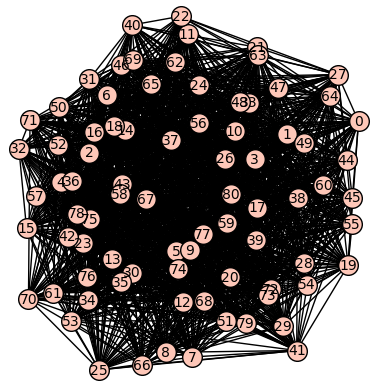

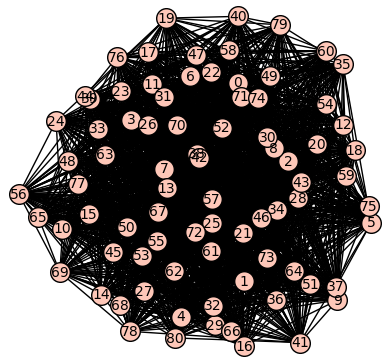

In [42]:
G.show()
H , _ = clique_construct(G)
H.show()

In [37]:
print("OA(d, n)\tIs Clique Regular?\tIs Strongly Regular?")
for i in range(3, 18):
    for j in range(10, 20):
        try:
            G = Graph(graphs.OrthogonalArrayBlockGraph(i,j).adjacency_matrix())
        except ValueError:
            print("OA(" + str(i) + ", " + str(j) + ")\tNOT POSSIBLE")
        except:
            print("OA(" + str(i) + ", " + str(j) + ")\tNOT FOUND")
        else:
            print("OA(" + str(i) + ", " + str(j) + ")\t" + str(is_clique_regular(G)) + "\t\t\t" + str(G.is_strongly_regular()))

OA(d, n)	Is Clique Regular?	Is Strongly Regular?
OA(3, 10)	True			True
OA(3, 11)	True			True
OA(3, 12)	True			True
OA(3, 13)	True			True
OA(3, 14)	True			True
OA(3, 15)	True			True
OA(3, 16)	True			True
OA(3, 17)	True			True
OA(3, 18)	True			True
OA(3, 19)	True			True
OA(4, 10)	True			True
OA(4, 11)	True			True
OA(4, 12)	True			True
OA(4, 13)	True			True
OA(4, 14)	True			True
OA(4, 15)	True			True
OA(4, 16)	True			True
OA(4, 17)	True			True
OA(4, 18)	True			True
OA(4, 19)	True			True
OA(5, 10)	NOT FOUND
OA(5, 11)	True			True
OA(5, 12)	True			True
OA(5, 13)	True			True
OA(5, 14)	True			True
OA(5, 15)	True			True
OA(5, 16)	True			True
OA(5, 17)	True			True
OA(5, 18)	True			True
OA(5, 19)	True			True
OA(6, 10)	NOT FOUND
OA(6, 11)	True			True
OA(6, 12)	True			True
OA(6, 13)	True			True
OA(6, 14)	True			True
OA(6, 15)	True			True
OA(6, 16)	True			True
OA(6, 17)	True			True
OA(6, 18)	True			True
OA(6, 19)	True			True
OA(7, 10)	NOT FOUND
OA(7, 11)	True			True
OA(7, 12)	True			True
OA(7, 13)	T

SignalError: Segmentation fault

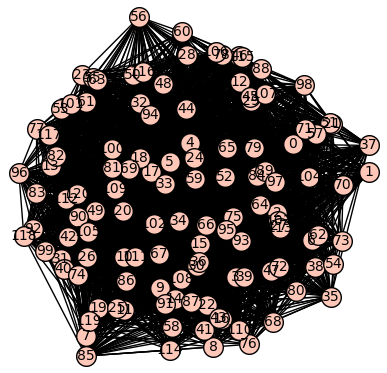

11 55


(121, 50, 21, 20)

In [36]:
G = Graph(graphs.OrthogonalArrayBlockGraph(5,11).adjacency_matrix())
G.show()
print(G.clique_number(), len(list(sage.graphs.cliquer.all_max_clique(G))))
G.is_strongly_regular(parameters=True)

In [7]:
G = graphs.strongly_regular_graph(324,119,46,42)
H, cliques = clique_construct(G)
print("w = " + str(G.clique_number()), ", n = " + str(len(list(cliques))))
GED = G.laplacian_matrix().elementary_divisors()
print("Elementary Divisors of G:", GED)
print(dict((i, GED.count(i)) for i in GED))
HED = H.laplacian_matrix().elementary_divisors()
print("Elementary Divisors of H:", HED)
print(dict((i, HED.count(i)) for i in HED))

w = 18 , n = 126
Elementary Divisors of G: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 18, 18, 18, 18, 18, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 756, 756, 756, 756, 756, 756, 756, 1512, 1512, 1512, 1512, 1512, 1512, 1512, 4536, 4536, 4536, 4536, 4536, 4536, 4536, 4536, 4536, 4536, 4536, 4536, 4536, 4536, 13608, 1